In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import re
%config InlineBackend.print_figure_kwargs={'facecolor' : "lightgrey"}

paths = [
    # "../results/20221126_1432_traditional-vivyan.metrics",
    # "../results/20221126_1435_old-roselin.metrics",  # Off-Diag: it sucks
    "../results/20221126_1527_bewildered-timmie.metrics",  # Baseline    
    # "../results/20221126_1533_defiant-avis.metrics",  # scaling=0.1
    "../results/20221126_1536_short-silvie.metrics",  # scaling=0.4
    "../results/20221126_1541_interim-randee.metrics",  # scaling=0.6
    "../results/20221126_1616_strict-yetta.metrics",  # path_normalization = element
    "../results/20221126_1621_disabled-vittoria.metrics",  # both = element 1e-3
    "../results/20221126_1630_typical-viva.metrics",  # both = element 3e-3
    "../results/20221126_1638_yodelling-ethelda.metrics",  # both = element 5e-3
]

paths = [
    "../results/20221126_1536_short-silvie.metrics",  # new Baseline
    # "../results/20221128_0112_excited-morgan.metrics",  # Velo
]


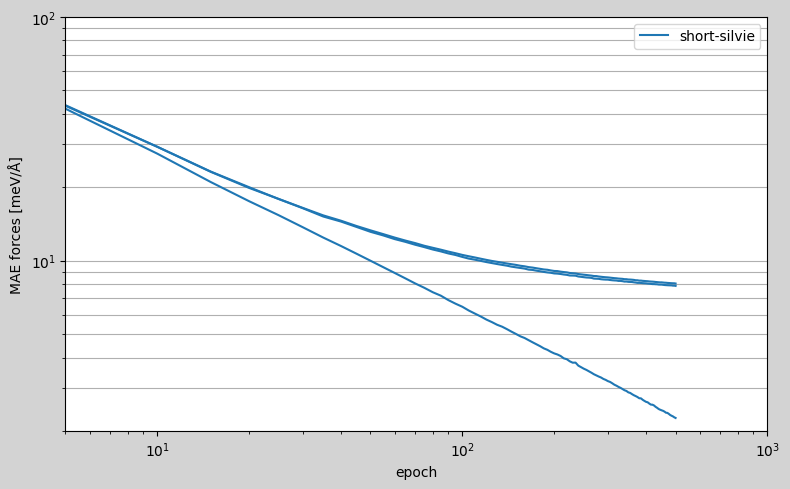

In [2]:
plt.figure(figsize=(8, 5), dpi=100)

for path in paths:
    with open(path, "rt") as f:
        jsons = [json.loads(line) for line in f.readlines()]

    tag = re.search(r"(\d{8}_\d{4})_(\w+-\w+)", path).group(2)

    x = np.array([json["epoch"] for json in jsons if json["mode"] == "eval_test"])
    y = np.array([1e3 * json["mae_f"] for json in jsons if json["mode"] == "eval_test"])
    [line] = plt.plot(x, y, label=tag)
    x = np.array([json["epoch"] for json in jsons if json["mode"] == "eval"])
    y = np.array([1e3 * json["mae_f"] for json in jsons if json["mode"] == "eval"])
    plt.plot(x, y, color=line.get_color())
    x = np.array([json["epoch"] for json in jsons if json["mode"] == "eval_train"])
    y = np.array([1e3 * json["mae_f"] for json in jsons if json["mode"] == "eval_train"])
    plt.plot(x, y, color=line.get_color())


plt.legend()
# plt.title(path)
plt.xlabel("epoch")
plt.ylabel("MAE forces [meV/Å]")
plt.grid(which="both", axis="y")
plt.xscale("log")
plt.yscale("log")
plt.ylim(2.0, 100.0)
plt.xlim(5.0, 1000.0)

plt.tight_layout()